Number of Cities 2 Stortest path: 0-1-0 cost: 34
Number of Cities 3 Stortest path: 0-1-2-0 cost: 51
Number of Cities 4 Stortest path: 1-0-3-2-1 cost: 94
Number of Cities 5 Stortest path: 0-3-2-1-4-0 cost: 108
Number of Cities 6 Stortest path: 5-1-2-3-0-4-5 cost: 90
Number of Cities 7 Stortest path: 4-2-1-6-0-3-5-4 cost: 117
Number of Cities 8 Stortest path: 1-0-6-5-2-7-4-3-1 cost: 97
Number of Cities 9 Stortest path: 5-2-8-4-1-0-6-3-7-5 cost: 137
Number of Cities 10 Stortest path: 0-4-6-7-5-3-8-1-2-9-0 cost: 118


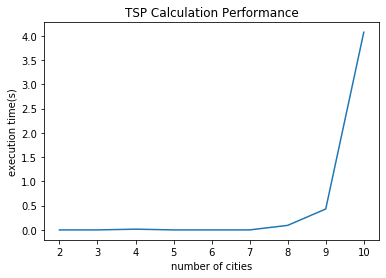

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

class TSP:
    
    def TSPAlgorithm(self ,numberofCities):

        self.numberofCities = numberofCities
        
        self.CreatDataSet()
        self.visitedCites = list()
        
        self.startCity = random.randint(0,self.numberofCities-1)

        self.visitedCites.append(self.startCity)

        self.minTSP = 0
        self.path = ''
        
        self.CalculatePath('',self.startCity,0)
        
        print("Number of Cities {} Stortest path: {} cost: {}".format(self.numberofCities,self.path,self.minTSP))
    
    def CreatDataSet (self):
        
        self.cityMatrix = np.random.randint(25,size=(self.numberofCities, self.numberofCities))
        self.cityMatrix = (self.cityMatrix + self.cityMatrix.T)
        self.cityMatrix = self.cityMatrix - np.diag(self.cityMatrix.diagonal())
        
        self.citylist = list(range(0,self.numberofCities))
    
    def CalculatePath(self, path, currentCity, cost):
        
        cities = list(filter( lambda city : city not in self.visitedCites, self.citylist))
        
        path += str(currentCity) + "-";
        if (len(cities)==0):
            
            cost += self.cityMatrix[currentCity, self.startCity];
            path += str(self.startCity);
            if(self.minTSP == 0 or self.minTSP > cost):
                self.minTSP = cost
                self.path = path
            return;
        
        for nextCity in cities:
            self.visitedCites.append(nextCity);
            self.CalculatePath(path, nextCity,cost+ self.cityMatrix[currentCity, nextCity]);

            del self.visitedCites[-1]
                            
obj = TSP()
                                    
citylist = range(2,11)
executionTime = []
                                    
for i in citylist:
    start = time.time()
    obj.TSPAlgorithm(i)
    end = time.time()
    executionTime.append(end- start)
                            
plt.plot(citylist,executionTime)
plt.xlabel("number of cities")
plt.ylabel("execution time(s)")
plt.title("TSP Calculation Performance")
plt.show()